In [13]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
url = 'https://github.com/SofiyaLyn/Thesis/raw/main/cleaned_data.csv'
cleaned_data = pd.read_csv(url)
cleaned_data.head()

,Year,Country,"Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)",IPO_market_share,New_Business,IPOs_Number_of_Issues,P/E_Ratio,E/P_ratio,Stock_Market_Index,Interest_rate_up_to_1_mln,...,Aver_interest_rate_to_nonfinance,Real_GDP_Growth_(%),Nominal_GDP_($B),Population_(M),Population_Growth_(%),GDP_Per_Capita_($),Real_Private_Consumption_Growth_(%),Real_Government_Consumption_Growth_(%),Real_Gross_Fixed_Investment_Growth_(%),Industrial_Production_Growth_(%)
0,2009,Hungary,0,0,42046,1,15,7,21227,0,...,0,-3,52,7,0,6961,-4,0,-15,-20
1,2010,Hungary,179,64,44269,4,12,8,21327,9,...,8,1,50,7,0,6825,1,6,-19,14
2,2011,Hungary,0,0,52217,1,10,9,16974,9,...,8,2,57,7,0,7817,2,0,-3,17
3,2012,Hungary,2,1,32311,1,12,8,18173,10,...,9,0,54,7,0,7403,2,0,2,2
4,2013,Hungary,1,0,28207,1,10,9,18564,8,...,8,0,55,7,0,7655,-3,2,0,0


In [26]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Year                                               238 non-null    int64 
 1   Country                                            238 non-null    object
 2   Proceeds_Amount_+_Over_Sold_This_Market__USD,_mln  238 non-null    int64 
 3   IPO_market_share                                   238 non-null    int64 
 4   New_Business                                       238 non-null    int64 
 5   IPOs_Number_of_Issues                              238 non-null    int64 
 6   P/E_Ratio                                          238 non-null    int64 
 7   Earnings_Price                                     238 non-null    int64 
 8   Stock_Market_Index                                 238 non-null    int64 
 9   Interest_rate_up_to_1

In [15]:
cleaned_data.columns = cleaned_data.columns.str.replace('(', '_').str.replace(')', '').str.replace('%', 'Percent').str.replace('$', 'Dollar')

In [16]:
cleaned_data['treated'] = cleaned_data['Country'].isin(["Hungary", "Poland", "Slovakia", "Czech Republic", "Slovenia", "Bulgaria", "Romania", "Estonia", "Latvia", "Lithuania"])
cleaned_data['treated'] = cleaned_data['treated'].astype(int)

cleaned_data['post_intervention'] = (cleaned_data['Year'] >= 2015).astype(int)
cleaned_data['treated_intervention'] = cleaned_data['treated'] * cleaned_data['post_intervention']

cleaned_data = cleaned_data.rename(columns={'E/P_ratio': 'Earnings_Price'})
print(cleaned_data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market__USD,_mln',
       'IPO_market_share', 'New_Business', 'IPOs_Number_of_Issues',
       'P/E_Ratio', 'Earnings_Price', 'Stock_Market_Index',
       'Interest_rate_up_to_1_mln', 'Interest_rate_over_€1M',
       'Aver_interest_rate_to_nonfinance', 'Real_GDP_Growth__Percent',
       'Nominal_GDP__DollarB', 'Population__M', 'Population_Growth__Percent',
       'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent',
       'Real_Government_Consumption_Growth__Percent',
       'Real_Gross_Fixed_Investment_Growth__Percent',
       'Industrial_Production_Growth__Percent', 'treated', 'post_intervention',
       'treated_intervention'],
      dtype='object')


In [17]:
formula = 'Earnings_Price ~ treated + post_intervention + treated_intervention'
model = smf.ols(formula, data=cleaned_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Earnings_Price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.267
Date:                Sat, 11 May 2024   Prob (F-statistic):             0.0814
Time:                        15:39:41   Log-Likelihood:                -984.00
No. Observations:                 238   AIC:                             1976.
Df Residuals:                     234   BIC:                             1990.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.8125 

# Ploting Graph

In [20]:
grouped_data = cleaned_data.groupby(['Year', 'treated']).agg({'Earnings_Price': 'mean'}).reset_index()
sns.set(style="whitegrid")


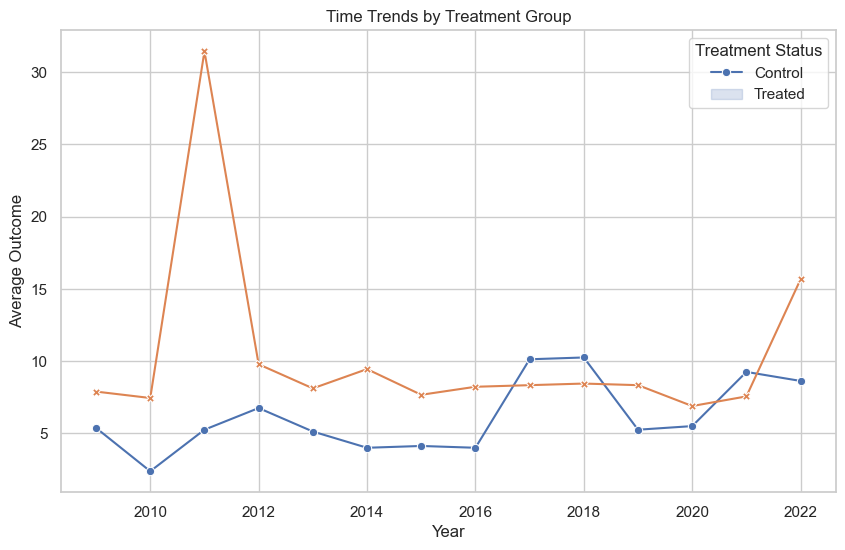

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='Earnings_Price', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Time Trends by Treatment Group')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])

# Show the plot
plt.show()

# With Controlled Variables

In [32]:
cleaned_data['intercept'] = 1
formula = """
Earnings_Price ~ treated + post_intervention + treated_intervention + GDP_Per_Capita__Dollar + Real_Private_Consumption_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent + intercept"""
model = smf.ols(formula, data=cleaned_data).fit()
results_controlled = smf.ols(formula, data=cleaned_data).fit()
print(results_controlled.summary())
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Earnings_Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.413
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.192
Time:                        16:03:25   Log-Likelihood:                -981.67
No. Observations:                 238   AIC:                             1981.
Df Residuals:                     229   BIC:                             2013.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [33]:
predict_data = cleaned_data[['Year', 'treated', 'post_intervention', 'treated_intervention',
                             'Population_Growth__Percent', 'GDP_Per_Capita__Dollar',
                             'Real_Private_Consumption_Growth__Percent',
                             'Real_Government_Consumption_Growth__Percent',
                             'Real_Gross_Fixed_Investment_Growth__Percent',
                             'Industrial_Production_Growth__Percent', 'intercept']]

In [35]:
predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))
predict_data['pred'] = results_controlled.predict(predict_data)
grouped_predict = predict_data.groupby(['Year', 'treated', 'post_intervention']).agg({'pred': 'mean'}).reset_index()

/var/folders/h1/_vx7lz596z5c_kynzkqz8l180000gn/T/ipykernel_9870/1618561723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))
/var/folders/h1/_vx7lz596z5c_kynzkqz8l180000gn/T/ipykernel_9870/1618561723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['pred'] = results_controlled.predict(predict_data)


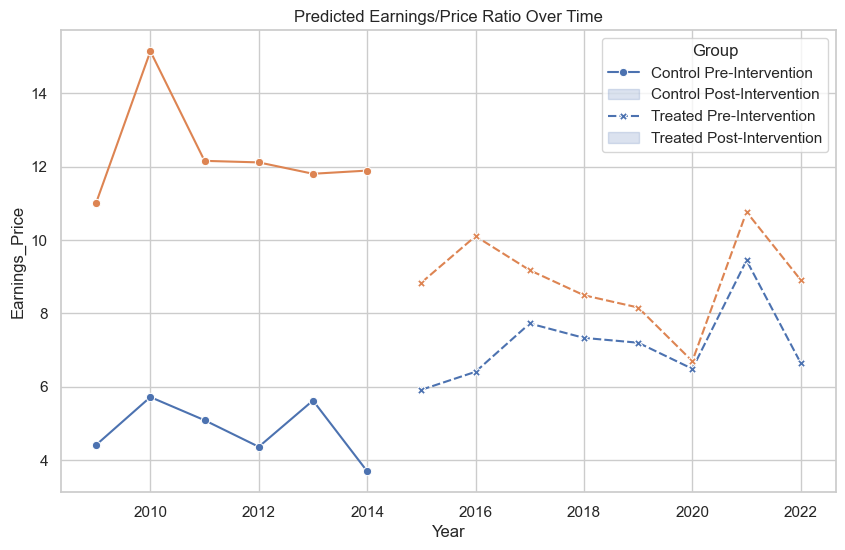

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_predict, x='Year', y='pred', hue='treated', style='post_intervention', markers=True)
plt.title('Predicted Earnings/Price Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Earnings_Price')
plt.legend(title='Group', labels=['Control Pre-Intervention', 'Control Post-Intervention', 'Treated Pre-Intervention', 'Treated Post-Intervention'])
plt.show()